<img src="idal-logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">mIA3</h1></font>
<font color="#6E6E6E"><h2 align="left">Empezando con Matplotlib de Python</h2></font> 

#### Juan Gómez-Sanchis

- <a href='#making_matplotlib'>Creando un objeto matplotlib</a>  

- <a href='#subplot'>Disposición de gráficos en subplot</a>

- <a href='#series_temp'>Visualizando series temporales</a>

- <a href='#barras'>Gráficos de barras</a>

- <a href='#barras_api'>Gráficos de barras apiladas</a>
     
- <a href='#histo'>Histogramas</a>

- <a href='#boxplot'>Gráficos de  boxplot</a>

- <a href='#dispersion'>Gráficos de dispersión (Scatter plots)</a>

- <a href='#estilo'>El estilo importa....</a>




In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#%matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7] # Me permite fijar por defecto el tamaño de las figuras

## <a id='making_matplotlib'>Creando un objeto matplotlib</a>

Cualquier método del objeto **plt** devuelve dos objetos, __fig__ es el contenedor del gráfico y __ax__ contiene los datos del gráfico. La función __show__ permite visualizar la figura. 

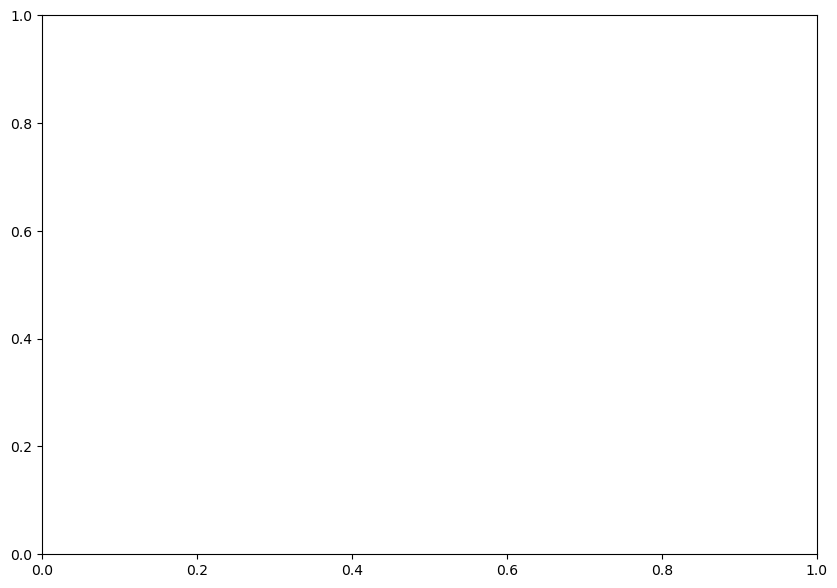

In [3]:
#Si no queremos usar el tamaño por defecto de figura...
#El argumento figsize=(7, 7) de subplot permite definir el tamaño de la figura
fig,ax=plt.subplots() 
plt.show() # Permite visualizar el resultado 

El método ``plot`` de **ax** permite crear un gráfico básico dándole valores a x e y. De paso recordamos como cargar un data frame con pandas!.

         DATE  PRCP  TMAX  TMIN  RAIN
0  1948-01-01  0.47    51    42  True
1  1948-01-02  0.59    45    36  True
2  1948-01-03  0.42    45    35  True
3  1948-01-04  0.31    45    34  True
4  1948-01-05  0.17    45    32  True
(25551, 5)


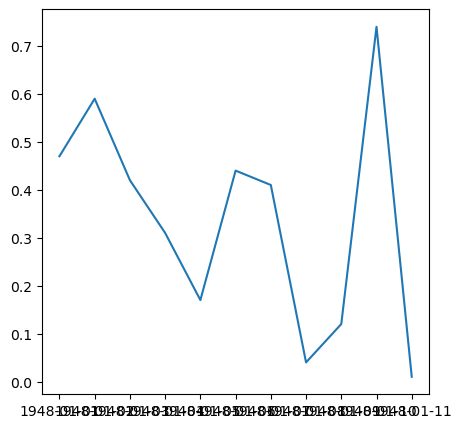

In [25]:
Weather =pd.read_csv("seattleWeather_1948-2017.csv")
print(Weather.head(5))
print(Weather.shape)

fig,ax=plt.subplots(figsize=(5, 5)) 
ax.plot(Weather.loc[0:10,"DATE"], Weather.loc[0:10,"PRCP"]) #Representamos las 10 primeras muestras de Weather
plt.show()


Creamos un data frame para jugar un poco....

In [26]:
df_X = pd.DataFrame({
    'Mes':['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct', 'Nov','Dic'],
    'Beneficio':[23,24,25,25,19,20,21,12,18,20,21,23],
    'Transacciones':[2340,3000,4000,5000,4525,6328,4526,1268,4521,2318,3124,3456]
})


df_Y = pd.DataFrame({
    'Mes':['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct', 'Nov','Dic'],
    'Beneficio':[15,14,15,15,9,10,11,2,8,10,11,13],
    'Transacciones':[1340,2000,3000,4000,3525,5328,3526,268,1521,1318,2124,2456]
})





In [27]:
df_X.head(5)

,Mes,Beneficio,Transacciones
0,Ene,23,2340
1,Feb,24,3000
2,Mar,25,4000
3,Abr,25,5000
4,May,19,4525


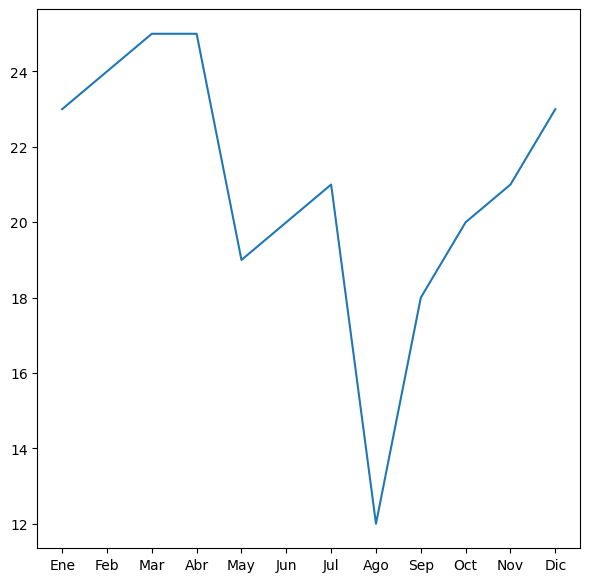

In [28]:
fig,ax=plt.subplots(figsize=(7, 7)) 
ax.plot(df_X["Mes"], df_X["Beneficio"])
plt.show()

No tenemos porque pintar datos de un data frame, aunque será lo más habitual... Veamos un ejemplo con listas...Además vamos a añadir puntos  en lugar de únicamente una línea..

Para conocer las diferentes opciones del argumento **marker** visita la web

https://matplotlib.org/api/markers_api.html



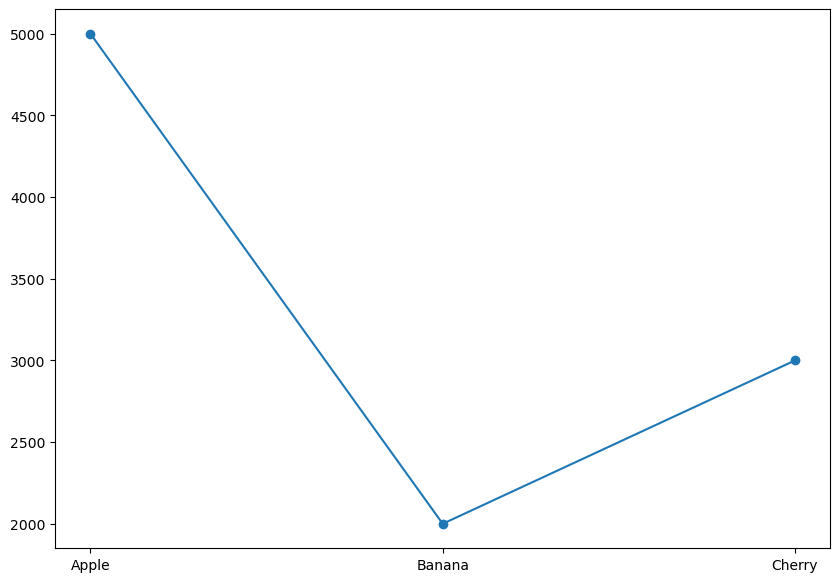

In [8]:
import matplotlib.pyplot as plt
x = ["Apple", "Banana", "Cherry"]
y = [5000,2000,3000]

fig,ax=plt.subplots(figsize=(10, 7)) 
ax.plot(x, y,marker="o")

plt.show()

En el siguiente ejemplo utilizaremos directamente la función **plt.plot** en lugar del método ``plot`` del objeto **ax**.

En el mismo ejemplo vamos a ver como  se puede variar el estilo de la línea con el argumento ``linestyle``. En el siguiente ejemplo utilizaremos el estilo de línea asociado a una línea de guiones. Si quisieramos hacer que la línea desaparezca, utilizararemos el estilo **"None".


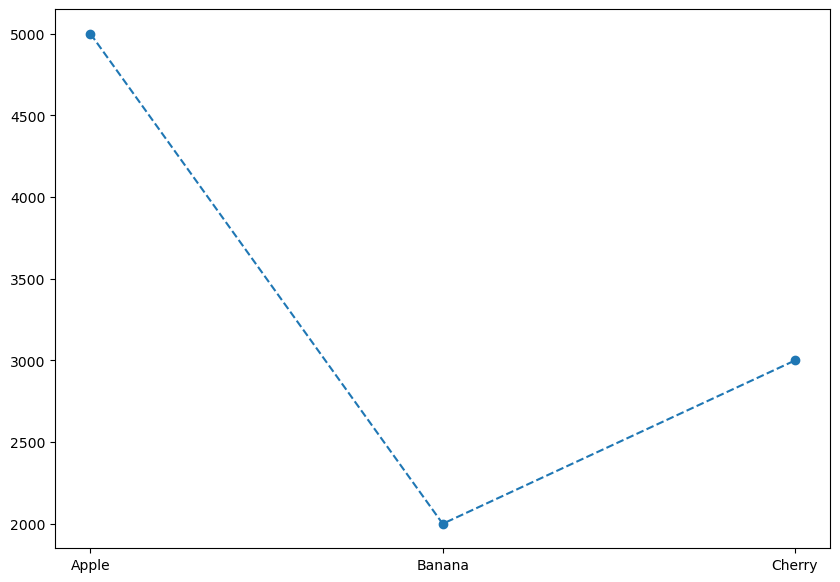

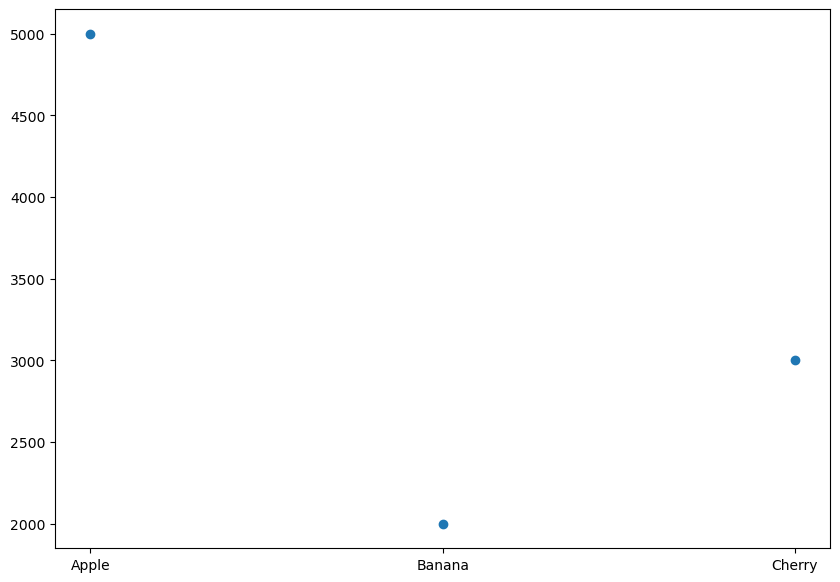

In [9]:

plt.plot(x, y,marker="o",linestyle="--")
plt.show()

plt.plot(x, y,marker="o",linestyle="None")
plt.show()

Para conocer más opciones del. argumento ``linestyle`` argumento puedes consultar la siguiente web:

https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

Podemos modificar el color de la línea y los puntos con el argumento **color**...

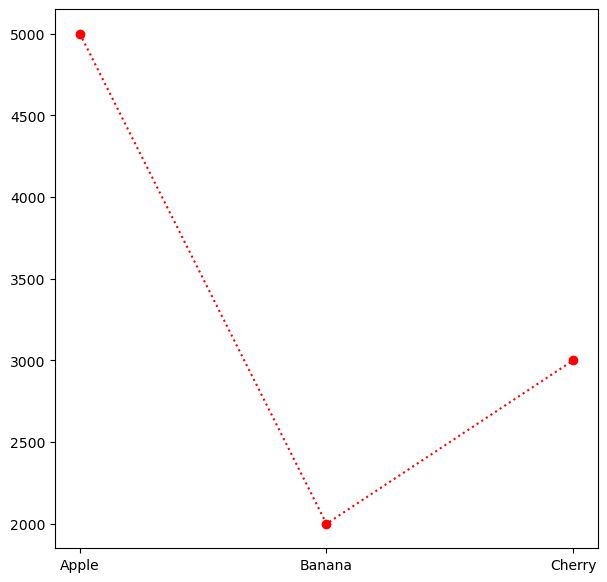

In [10]:
fig,ax=plt.subplots(figsize=(7, 7)) 

ax.plot(x, y,marker="o",linestyle=":",color="r")
plt.show()



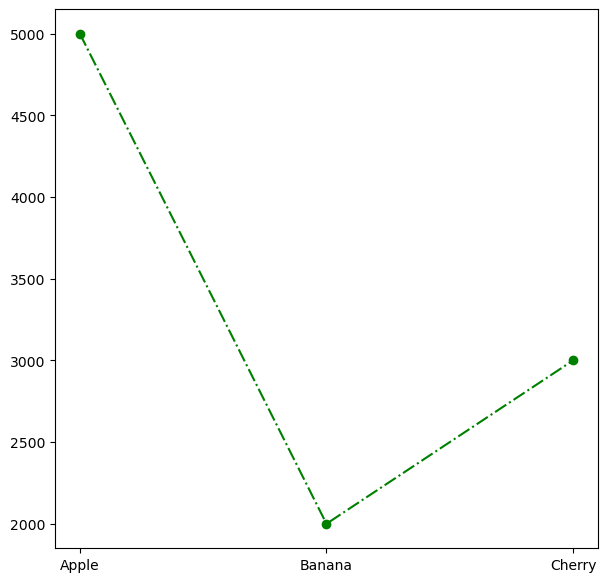

In [11]:
fig,ax=plt.subplots(figsize=(7, 7)) 
ax.plot(x, y,marker="o",linestyle="-.",color="g")
plt.show()

Existen una serie de métodos de **ax** que comienzan por **set_** que nos permiten ajustar propiedades del gráfico como la etiqueta del eje x, del eje y o el título...

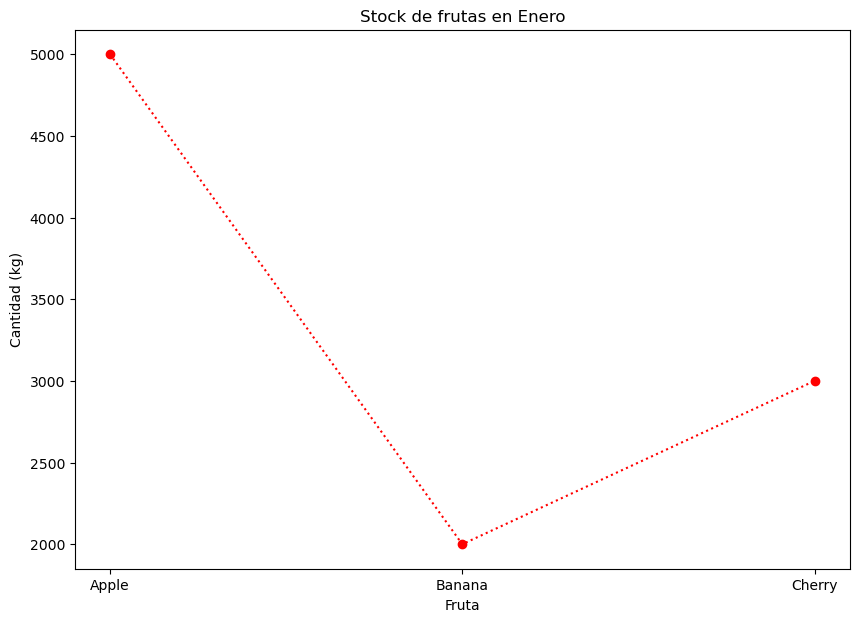

In [12]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7) #Otra forma de ajustar el tamaño de la figura
ax.plot(x, y,marker="o",linestyle=":",color="r")
ax.set_xlabel("Fruta")
ax.set_ylabel("Cantidad (kg)")
ax.set_title("Stock de frutas en Enero")
plt.show()


## Ejercicio 1

* Carga los ficheros ``Oficina_Bank_X.csv`` y ``Oficina_Bank_Y.csv"`` y representa en un gráfico los beneficios de las oficinas X e Y frente al mes. Queremos que la oficina X este representada con circulos verdes y la oficina Y con triangulos rojos. El trazo de la línea será discontinuo con guiones. No olvides añadir etiquetas en los ejes x e y, además de un título.

* Representa en otro  gráfico el número de transacciones de las oficinas X e Y frente al mes. Queremos que la oficina X este representada con estrellas azules y la oficina Y con cuadrados negros. El trazo de la línea será punteado. No olvides añadir etiquetas en los ejes x e y, además de un título.


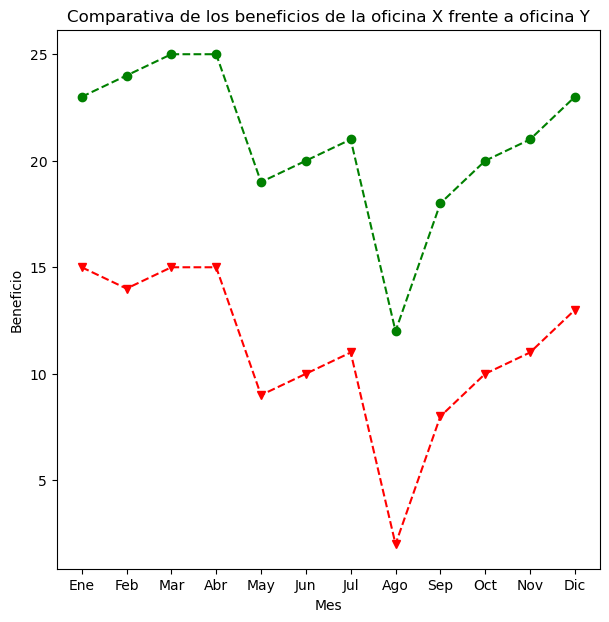

In [13]:
#1.1

Banco_x = pd.read_csv("Oficina_Bank_X.csv")
Banco_y = pd.read_csv("Oficina_Bank_Y.csv")

Banco_x.head(5)
Banco_y.head(10)

fig1,ax1 = plt.subplots() 
fig1.set_size_inches(7,7)
ax1.plot(Banco_x["Mes"], Banco_x["Beneficio"], marker = 'o', linestyle = '--', color = 'g')
ax1.plot(Banco_y["Mes"], Banco_y["Beneficio"], marker = 'v', color = 'r', linestyle = '--')

ax1.set_xlabel("Mes")
ax1.set_ylabel("Beneficio")
ax1.set_title("Comparativa de los beneficios de la oficina X frente a oficina Y")

# ax.plot(Banco_x.loc[:,"Beneficio"], Banco_x.loc[:,"Mes"])
# ax.plot(Banco_y.loc[:,"Beneficio"], Banco_y.loc[:,"Mes"])
plt.show()

Text(0.5, 1.0, 'Comparativa del número de transacciones de la oficina X frente a oficina Y')

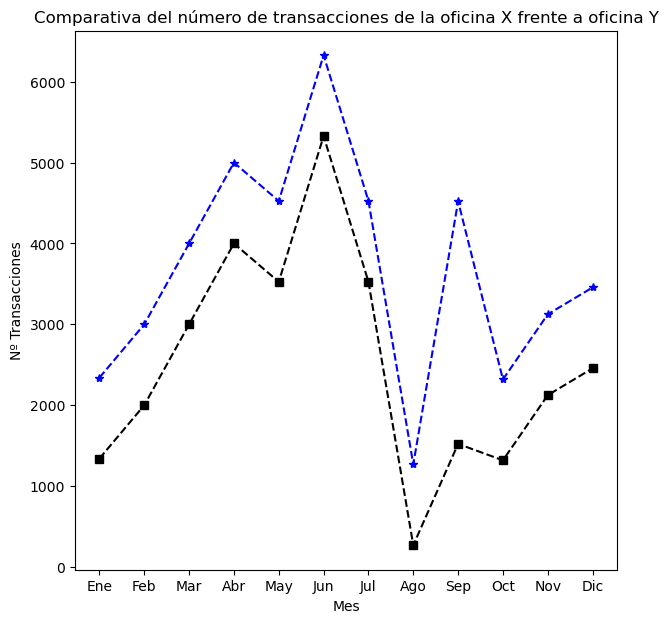

In [14]:
#1.2

fig1,ax1 = plt.subplots() 
fig1.set_size_inches(7,7)
ax1.plot(Banco_x["Mes"], Banco_x["Transacciones"], marker = '*', linestyle = '--', color = 'b')
ax1.plot(Banco_y["Mes"], Banco_y["Transacciones"], marker = 's', linestyle = '--', color = 'k')

ax1.set_xlabel("Mes")
ax1.set_ylabel("Nº Transacciones")
ax1.set_title("Comparativa del número de transacciones de la oficina X frente a oficina Y")

## <a id='subplot'>Disposición de gráficos en subplot</a>

En ocasiones es especialmente interesante organizar una figura en diferentes subfiguras en las que cada una contenga un gráfico diferente. Para conseguir este propósito utilizaremos la función ``subplot`` de **pyplot**. Veamos un ejemplo de lo que estamos hablando.

<class 'numpy.ndarray'>


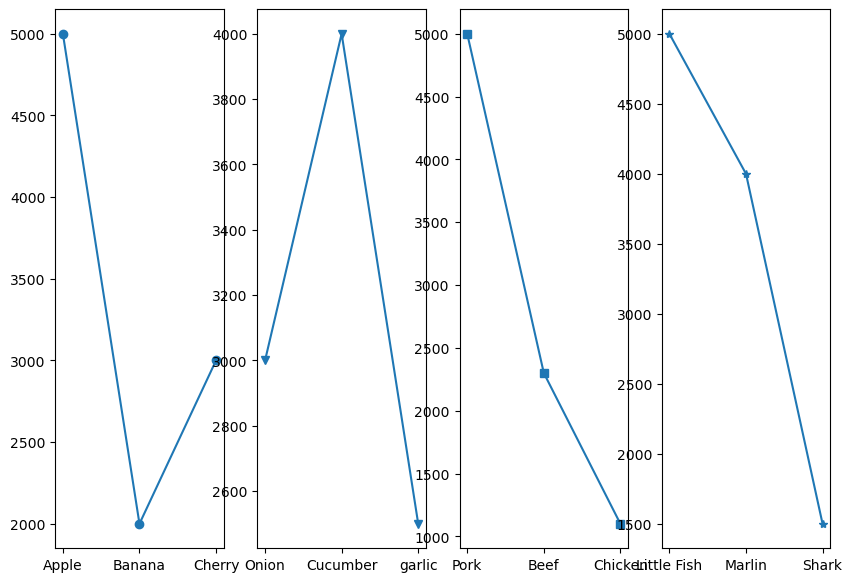

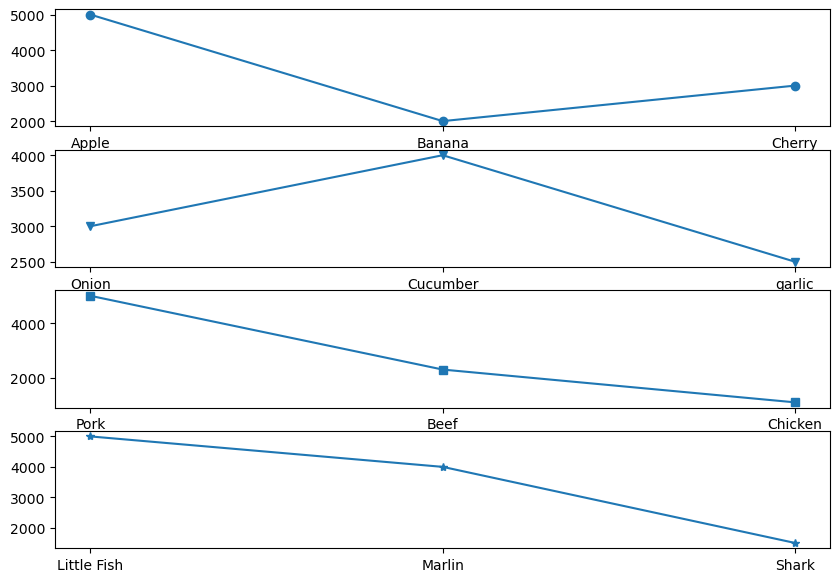

In [30]:
x = ["Apple", "Banana", "Cherry"]
y = [5000,2000,3000]

x2 = ["Onion", "Cucumber", "garlic"]
y2 = [3000,4000,2500]

x3 = ["Pork", "Beef", "Chicken"]
y3 = [5000,2300,1100]

x4 = ["Little Fish", "Marlin", "Shark"]
y4 = [5000,4000,1500]


#En filas

fig,ax=plt.subplots(1,4) #Array que define el subplot en este caso una fila y cuatro columna
fig.set_size_inches(10, 7)
print(type(ax))
ax[0].plot(x, y,marker="o")
ax[1].plot(x2, y2,marker="v")
ax[2].plot(x3, y3,marker="s")
ax[3].plot(x4, y4,marker="*")
plt.show()

# o columnas

fig,ax=plt.subplots(4,1) #Array que define el subplot en este caso cuatro filas y una columna
fig.set_size_inches(10, 7)
ax[0].plot(x, y,marker="o")
ax[1].plot(x2, y2,marker="v")
ax[2].plot(x3, y3,marker="s")
ax[3].plot(x4, y4,marker="*")
plt.show()



En un array de 2x2 estaría mejor ordenados no?. Veamos que ocurre cuando el array contiene más de una fila o una columna?

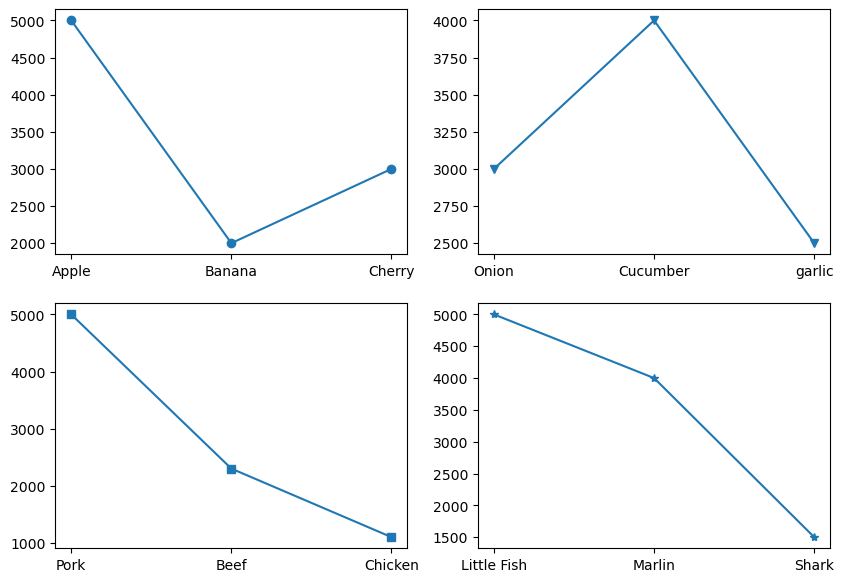

In [16]:
#Un array 2x2
fig,ax=plt.subplots(2,2) #Array que define el subplot en este caso dos filas y una columna
fig.set_size_inches(10, 7)
ax[0,0].plot(x, y,marker="o")
ax[0,1].plot(x2, y2,marker="v")
ax[1,0].plot(x3, y3,marker="s")
ax[1,1].plot(x4, y4,marker="*")
plt.show()


Si queremos que la escala sea la misma no tenemos más que utilizar el argumento **sharey=True** de la función **subplot**.

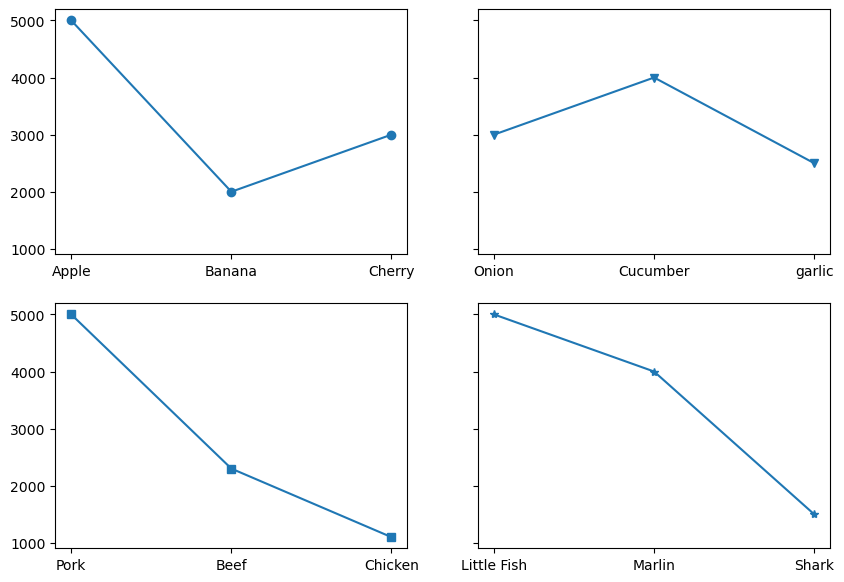

In [17]:
#Si queremos que la escala sea la misma en todos los gráficos...
fig,ax=plt.subplots(2,2,sharey=True) #Array que define el subplot en este caso dos filas y dos columna
fig.set_size_inches(10, 7)
ax[0,0].plot(x, y,marker="o")
ax[0,1].plot(x2, y2,marker="v")
ax[1,0].plot(x3, y3,marker="s")
ax[1,1].plot(x4, y4,marker="*")



plt.show()

Otra aproximación para crear un subplot con pyplot es a partir de una figura creada previamente. Podemos crear una objeto figura a partir de la función ``figure`` de **pyplot** y luego añadir los gráficos en objetos de tipo **axis** a la figura con el método ``add_subplot``. Además en este ejemplo vamos a ver otra forma de indexar los gráficos dentro del subplot (FILAS,COLUMNAS,SUBPLOT).Veamos un ejemplo...

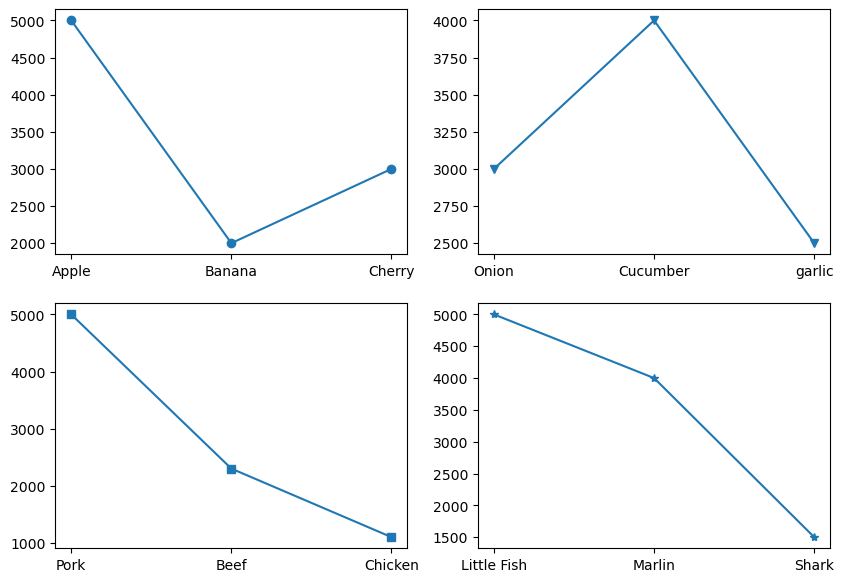

In [18]:


fig = plt.figure()
fig.set_size_inches(10, 7)  
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Turn off axis lines and ticks of the big subplot
#ax.spines['top'].set_color('none')
#ax.spines['bottom'].set_color('none')
#ax.spines['left'].set_color('none')
#ax.spines['right'].set_color('none')
#ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

#ax.set_title('Producción de alimentos  ofrecidos por la empresa')

ax1.plot(x, y,marker="o")
ax2.plot(x2, y2,marker="v")
ax3.plot(x3, y3,marker="s")
ax4.plot(x4, y4,marker="*")
plt.show()

## <a id='series_temp'>Visualizando series temporales</a>

Otro tipo de visualización interesante es la referente a series de datos temporales. A continuación vamos a cargar el fichero ``GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity_jgx.csv``

In [19]:
#OMITIR EN LA EXPLICACIÓN

df_climate1 =pd.read_csv("GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv")
df_climate2 =pd.read_csv("seattleWeather_1948-2017.csv")

df_climate1
df_climate1['dt'] = pd.to_datetime(df_climate1['dt'],format="%Y-%m-%d")#convierto a datetime el str
df_climate1.to_csv("GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity_jgx.csv")






El data frame no define la variable **dt** como una fecha, por eso la convertiremos con la función ``datetime`` de pandas. Vamos a seleccionar los datos de la ciudad de **Xian**, el data frame resultante lo guaradaremos en el data frame ``df_climate1_country``. Luego haremos una copia, para no modificar la variable original. Convertiremos el data frame ``dt`` a un formato de fecha y haremos que esa variable sea el **índice del data frame** para aprovechar la  ventajas de visualización de matplotlib. 

In [20]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df_climate1 =pd.read_csv("../data_jgx/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity_jgx.csv")
df_climate1_country=df_climate1[(df_climate1['City']=='Xian')]

df_climate3=df_climate1_country.copy() #Crea una copia de climate1_country


df_climate3['dt'] = pd.to_datetime(df_climate1_country['dt'],format="%Y-%m-%d")#convierto a datetime el str
df_climate3.set_index('dt',inplace=True) #convierto la variable dt en el index
ochenta_Xian=df_climate3['1980-01-01':'1990-01-01'] #Filtramos los datos de la decada de los 80..



fig, ax=plt.subplots()
fig.set_size_inches(10, 7)
#ax.plot(df_climate1_slice.index, df_climate1_slice["AverageTemperature"])
ax.plot(ochenta_Xian.index, ochenta_Xian["AverageTemperature"],marker="o",color="r",linestyle=":")
ax.set_xlabel("Año")
ax.set_ylabel("Temperatura promedio")
ax.set_title("Registros de temperaturas de los años 80 en la ciudad de Xian")


FileNotFoundError: [Errno 2] No such file or directory: '../data_jgx/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity_jgx.csv'

Como hemos visto en ejemplos anteriores podemos superponer más de una curva

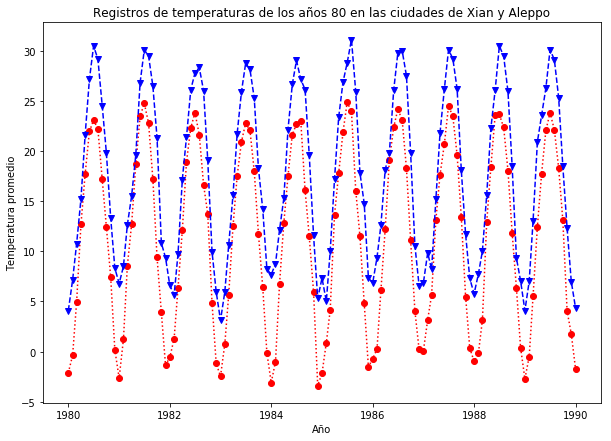

In [ ]:
#Opción 2, mucho más ELEGANTE lo hacemos todo (convertir dt en index y datetime) con la carga del fichero
df_climate1 =pd.read_csv("../data_jgx/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity_jgx.csv",
                         parse_dates=["dt"], index_col="dt")

#Xian
df_climate1_country=df_climate1[(df_climate1['City']=='Xian')]
ochenta_Xian=df_climate1_country['1980-01-01':'1990-01-01']
#Aleppo
df_climate1_country=df_climate1[(df_climate1['City']=='Aleppo')]
ochenta_Aleppo=df_climate1_country['1980-01-01':'1990-01-01']

fig, ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.plot(ochenta_Xian.index, ochenta_Xian["AverageTemperature"],marker="o",color="r",linestyle=":")
ax.plot(ochenta_Aleppo.index, ochenta_Aleppo["AverageTemperature"],marker="v",color="b",linestyle="--")

ax.set_xlabel("Año")
ax.set_ylabel("Temperatura promedio")
ax.set_title("Registros de temperaturas de los años 80 en las ciudades de Xian y Aleppo")
plt.show()


Podemos incluso visualizar los dos graficos en un subplot...

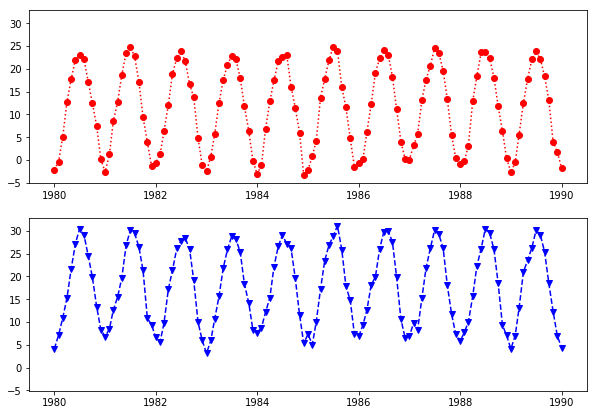

In [ ]:
fig, ax=plt.subplots(2,1,sharey=True)
fig.set_size_inches(10, 7)
ax[0].plot(ochenta_Xian.index, ochenta_Xian["AverageTemperature"],marker="o",color="r",linestyle=":")
ax[1].plot(ochenta_Aleppo.index, ochenta_Aleppo["AverageTemperature"],marker="v",color="b",linestyle="--")

plt.show()

A continuación vamos a ver como representar dos series temporales en el mismo gráfico.  Supongamos que queremos representar las dos series temporales correspondientes a las variables ``AverageTemperature`` y ``AverageTemperatureUncertainty``

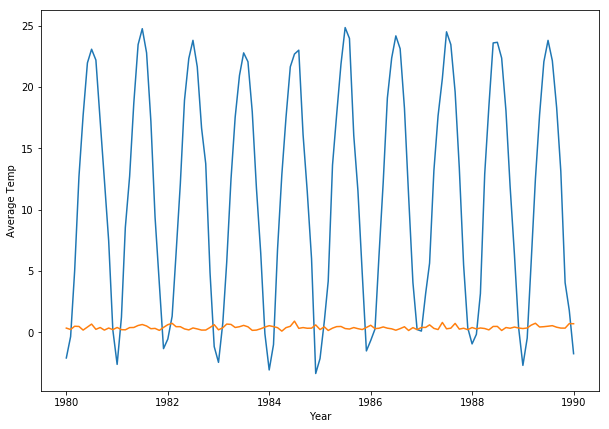

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.plot(ochenta_Xian.index, ochenta_Xian["AverageTemperature"])
ax.plot(ochenta_Xian.index, ochenta_Xian["AverageTemperatureUncertainty"])
ax.set_xlabel("Year")
ax.set_ylabel("Average Temp")
plt.show()

¿Qué problema observas en el gráfico anterior? En efecto, ambas variables poseen diferentes escalas. Vamos a solventar este problema añadiendo otro objeto **axis** igual a  **ax** con el método ``.twinx`` y luego crearemos el plot en ese nuevo objeto de tipo axis... Veamos como hacerlo!

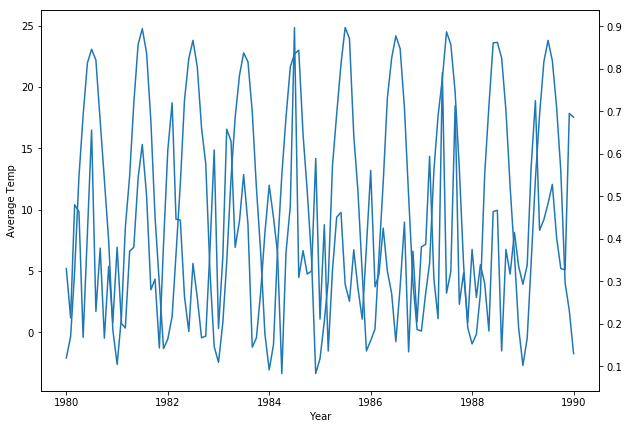

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.plot(ochenta_Xian.index, ochenta_Xian["AverageTemperature"])
ax.set_xlabel("Year")
ax.set_ylabel("Average Temp")
#Creo los segundo objeto axis, ax2!
ax2=ax.twinx()
ax2.plot(ochenta_Xian.index, ochenta_Xian["AverageTemperatureUncertainty"])
plt.show()

Ya tenemos dos escalas, una a la izquierda y otra a la derecha... Pero no se ve nada.. Pero esto no es un problema! Sabemos modificar el color!

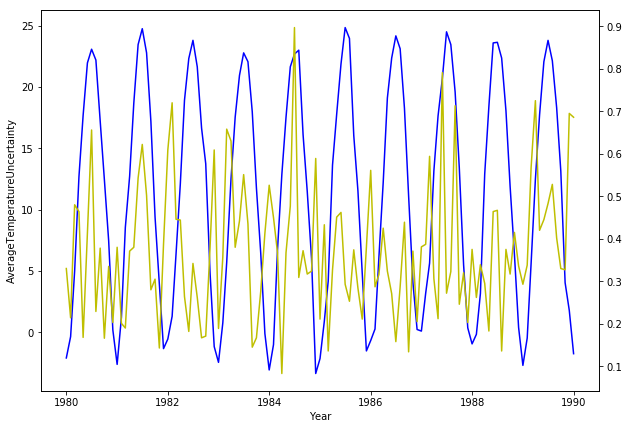

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.plot(ochenta_Xian.index, ochenta_Xian["AverageTemperature"],color='b')
ax.set_xlabel("Year")
ax.set_ylabel("Average Temp")

#Creo los segundo objerto axis, ax2!
ax2=ax.twinx()
ax2.plot(ochenta_Xian.index, ochenta_Xian["AverageTemperatureUncertainty"],color="y")
ax.set_ylabel("AverageTemperatureUncertainty")
plt.show()

## <a id='barras'>Gráficos de barras</a>


Vamos a pasar a ver como representar otro tipo de gráficos, en concreto los **gráficos de barras**. Para ello vamos a cargar un conjunto con el medallero de las olimpiadas de londres de 2016, con la opción ``index_col=0`` para que el data frame utilice como índices los países (Vimos que esta opción era interesante con las series temporales)

In [ ]:
#Medallas=pd.read_clipboard()
#Medallas_OK=Medallas.iloc[:,0:]
Medallas=pd.read_csv("../data_jgx/Medallas_jgx.csv",index_col=0) 
Medallas.head()

,G,S,B,TOTAL
GROUP,,,,
USA,46,37,38,121
CHN,26,18,26,70
GBR,27,23,17,67
RUS,19,18,19,56
GER,17,10,15,42


Veamos lo sencillo que es hacer un gráfico de barras... a priori procederemos igual, crearemos una figura y un objeto ax con la función **subplots** de **plt**

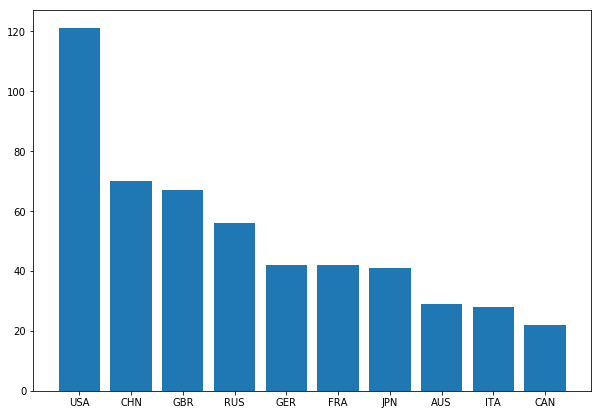

In [ ]:
#Generamos una selección de los 10 primeros paises con más medallas
MedallasReducido=Medallas.iloc[0:10,:].copy()
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.bar(MedallasReducido.index,MedallasReducido["TOTAL"])
plt.show()

Utilizando el método ``.set_xticklabels()`` podemos rotar las etiquetas del eje x. Del mismo modo que vimos con otros tipos de gráficos, podemos añadir etiquietas en los ejes x e y, utilizando los métodos ``.set_xlabel()``


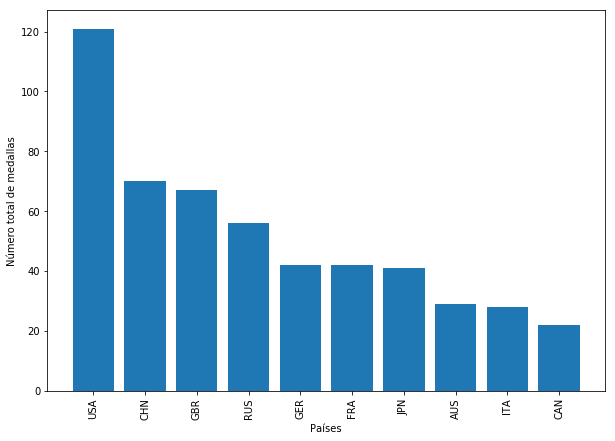

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.bar(MedallasReducido.index,MedallasReducido["TOTAL"])
ax.set_xticklabels(MedallasReducido.index,rotation=90)
ax.set_xlabel("Países")
ax.set_ylabel("Número total de medallas")
plt.show()

Podemos visualizar en lugar de las medallas totales, solo  las medallas de oro...

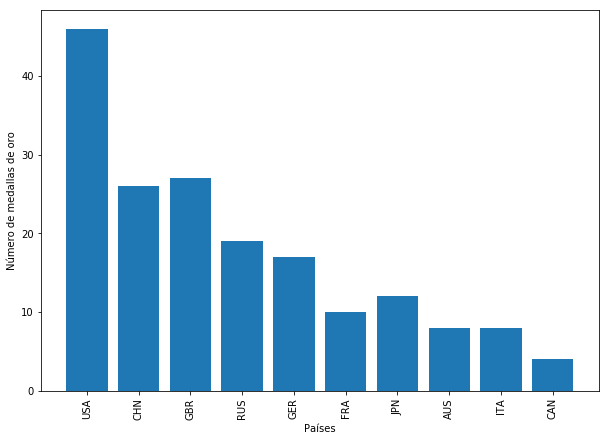

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.bar(MedallasReducido.index,MedallasReducido["G"])
ax.set_xticklabels(MedallasReducido.index,rotation=90)
ax.set_xlabel("Países")
ax.set_ylabel("Número de medallas de oro")
plt.show()

## <a id='barras_api'>Gráficos de barras apiladas</a>

En muchas ocasiones tiene sentido, con el propósito de comparar, incluir más de una variable. Por ejemplo, comparar el número de medallas de oro con las de plata. Podemos plantearnos superponer los graficos de barras de dos variables, lo que ocurre es que en ocasiones parte de la información quedará oculta.... **Veamos a que nos referimos**...



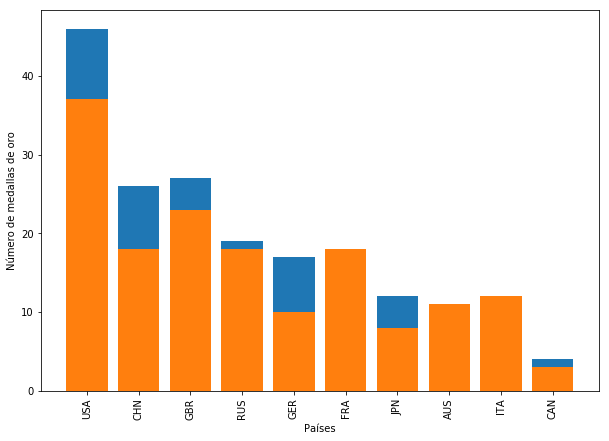

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.bar(MedallasReducido.index,MedallasReducido["G"])
ax.bar(MedallasReducido.index,MedallasReducido["S"])

ax.set_xticklabels(MedallasReducido.index,rotation=90)
ax.set_xlabel("Países")
ax.set_ylabel("Número de medallas de oro")
plt.show()

Podemos evitar este efecto usando el argumento ``bottom=`` del método ``.bar``. En el siguiente ejemplo veremos como apilar el valor de cada variable para realizar un estudio comparativo... 

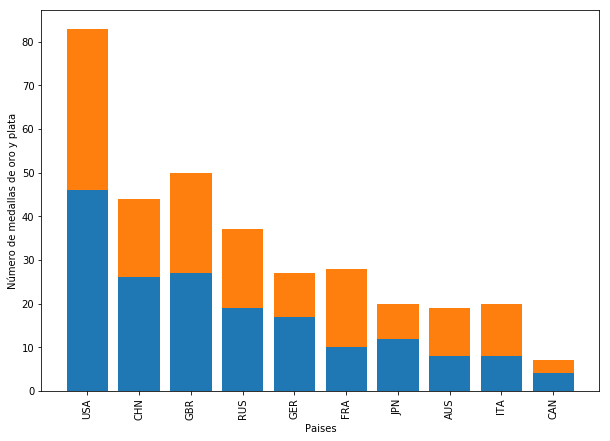

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.bar(MedallasReducido.index,MedallasReducido["G"])
ax.bar(MedallasReducido.index,MedallasReducido["S"],bottom=MedallasReducido["G"])

ax.set_xticklabels(MedallasReducido.index,rotation=90)
ax.set_xlabel("Paises")
ax.set_ylabel("Número de medallas de oro y plata")
plt.show()

Ya estamos viendo la dinámica de como funciona el modo de apilar barras, vamos a añadir otra barra para las medallas de bronce.

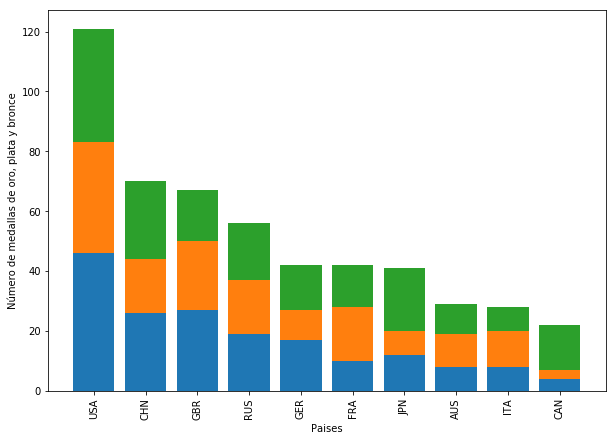

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.bar(MedallasReducido.index,MedallasReducido["G"])
ax.bar(MedallasReducido.index,MedallasReducido["S"],bottom=MedallasReducido["G"])

ax.bar(MedallasReducido.index,MedallasReducido["B"],bottom=MedallasReducido["G"]+MedallasReducido["S"])

ax.set_xticklabels(MedallasReducido.index,rotation=90)
ax.set_xlabel("Paises")
ax.set_ylabel("Número de medallas de oro, plata y bronce")
plt.show()

Si... ya lo sé... todos estamos pensando lo mismo.... Falta una leyenda!!!!! Utilizaremos el método ``.legend()`` del objeto **ax**. No tenemos que olvidar añadir el argumento ``label`` a cada objeto **ax**

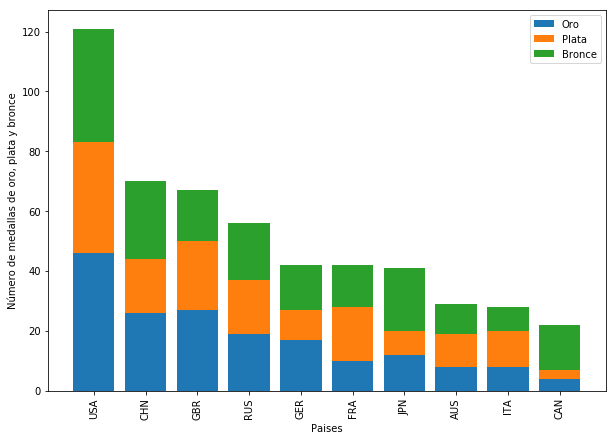

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.bar(MedallasReducido.index,MedallasReducido["G"],label="Oro")
ax.bar(MedallasReducido.index,MedallasReducido["S"],bottom=MedallasReducido["G"],label="Plata")

ax.bar(MedallasReducido.index,MedallasReducido["B"],bottom=MedallasReducido["G"]+MedallasReducido["S"], label="Bronce")

ax.set_xticklabels(MedallasReducido.index,rotation=90)
ax.set_xlabel("Paises")
ax.set_ylabel("Número de medallas de oro, plata y bronce")

ax.legend() #Es importante añadir la label en cada ax.bar de cara a ¡utilizar una leyenda...

plt.show()

## <a id='histo'>Histogramas</a>

A continuación vamos a presentar otros tipos de gráficos de barras ampliamente utilizado en ciencia de datos... Los histogramas!. Para ello cargamos el data set ``athletes_jgx.csv`` y emplearemos las 1000 primeras muestras.


/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


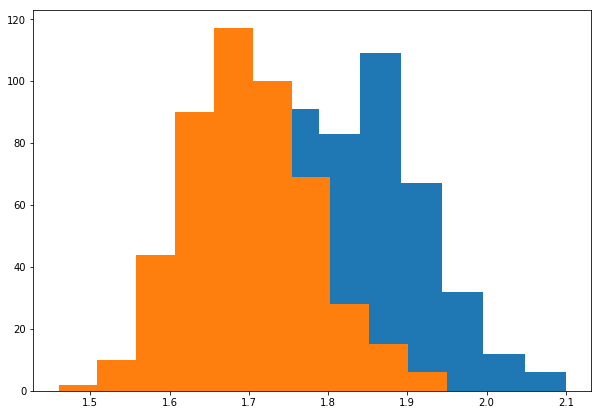

In [ ]:
Deportistas=pd.read_csv("../data_jgx/athletes_jgx.csv") 
Deportistas_reduce=Deportistas.iloc[0:1000,1:].copy()
Deportistas_reduce.set_index("name")

#Filtramos datos de hombres y mujeres
Deportistas_hombres=Deportistas_reduce[Deportistas_reduce["sex"]=='male']
Deportistas_mujeres=Deportistas_reduce[Deportistas_reduce["sex"]=='female']


fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.hist(Deportistas_hombres["height"])
ax.hist(Deportistas_mujeres["height"])
plt.show()

En los histogramas son especialmente importantes colocar etiquetas para en cada objeto ``.hist`` de cara a utilizar leyendas.... La idea es la misma que con los gráficos de barras.


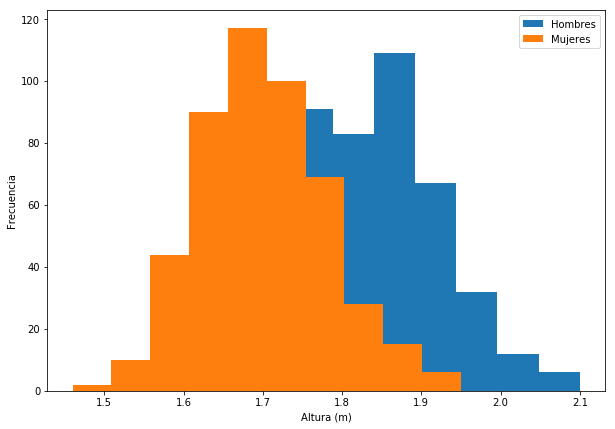

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.hist(Deportistas_hombres["height"],label="Hombres")
ax.hist(Deportistas_mujeres["height"],label="Mujeres")
ax.set_xlabel("Altura (m)")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()

Podemos elegir el número de bins (argumento ``bins``) mediante un entero (50) o una secuencia ([1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1]) donde se separan los bins...

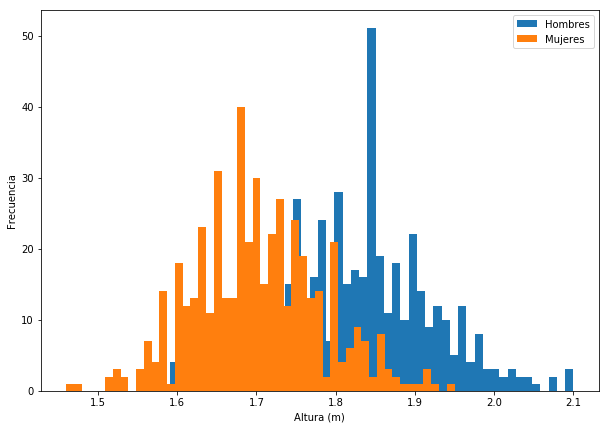

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.hist(Deportistas_hombres["height"],label="Hombres",bins=50)
ax.hist(Deportistas_mujeres["height"],label="Mujeres",bins=50)
ax.set_xlabel("Altura (m)")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()

La superposición de ambas distribuciones con un tipo de histograma de barras puede ser contraproducente para ver la cola de de una de las distribuciones. Podemos utilizar el argumento ``histype`` del ``ax.hist`` con la opción **"bar"** o **"step"**. Por defecto la opción es **bar**.

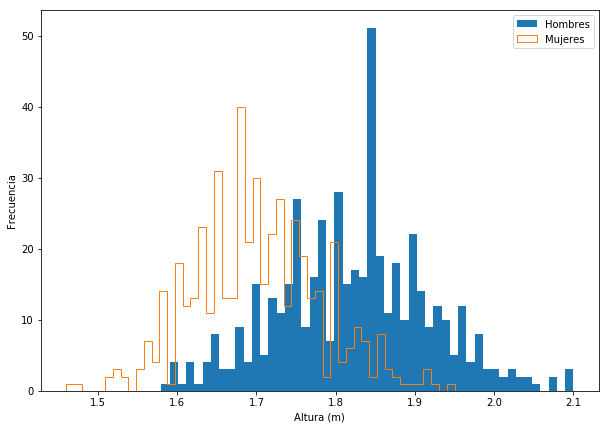

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)

ax.hist(Deportistas_hombres["height"],label="Hombres",bins=50)
ax.hist(Deportistas_mujeres["height"],label="Mujeres",bins=50,histtype="step")
ax.set_xlabel("Altura (m)")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()

##  Ejercicio 2

* Carga el fichero ``countries_r_jgx.csv`` con la opción de ``read_csv`` para que los índices del data frame los proporcione la columna ``Country`` (columna 1). Asegúrate de utilizar como separador decimal la ``,`` con la opción ``decimal=","``. 
* Representa en un gráfico de barras la variable ``GDP``  de todos los paises del dataset rotando las etiquetas  con el nombre del país. No olvides poner etiquetas en los ejes. ¿Y si lo queremos en orden ascendent de GDP?
* Representa un grafico de barras que permita comparar los porcentajes de superficie dedicados a los cultivos ``SurfaceCrops`` al terreno arable ``SurfaceArable`` y a otros tipos de terreno ``SurfaceOther``.
* Representa en una figura un histograma correspondiente a la variable ``Birthrate`` con 6 bins.
* Compara las distribuciones de la tasa de natalidad para aquellos paises con un valor de la variable ``GDP`` mayor de 28000 frente a los que toman un valor menor. En un caso utiliza barras solidas y en otro barras trasparentes. No olvides colocar una leyenda que clarifique el gráfico.
 

In [ ]:
#2.1


,Population,Area,Net.migration,GDP,Phones,Surf_Arable,Surf_Crops,Surf_Other,Climate,Birthrate,Deathrate,Sec_Agriculture,Sec_Industry,Sec_Service
Country,,,,,,,,,,,,,,
Australia,20264082,7686850,3.98,29000,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
Austria,8192880,83870,2.00,30000,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678
Belgium,10379067,30528,1.23,29100,462.6,23.28,0.40,76.32,3.0,10.38,10.27,0.010,0.240,0.749
Canada,33098932,9984670,5.96,29800,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
Denmark,5450661,43094,2.48,31100,614.6,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735


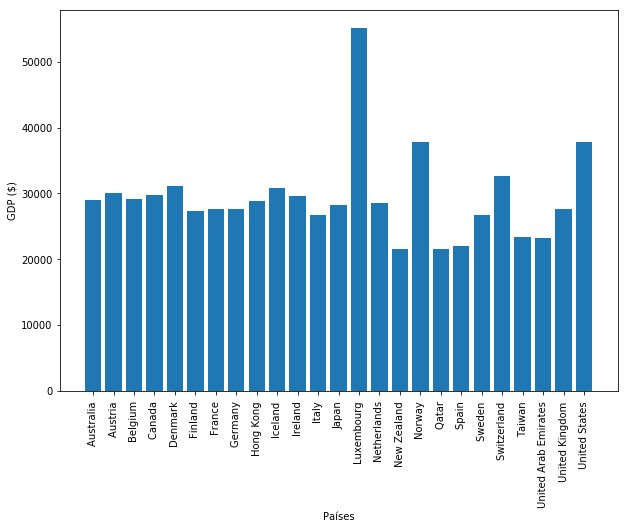

In [ ]:
# 2.2.1
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.bar(country.index,country["GDP"],label="GDP")
ax.set_xticklabels(country.index,rotation=90)
ax.set_xlabel("Países")
ax.set_ylabel("GDP ($)")
plt.show()

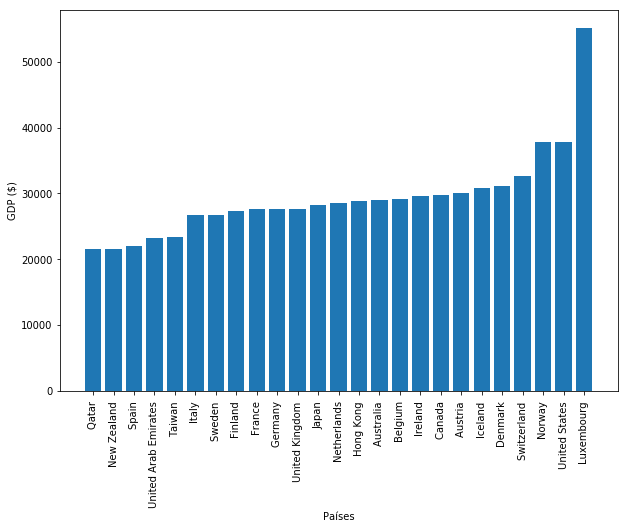

In [ ]:
#2.2.2


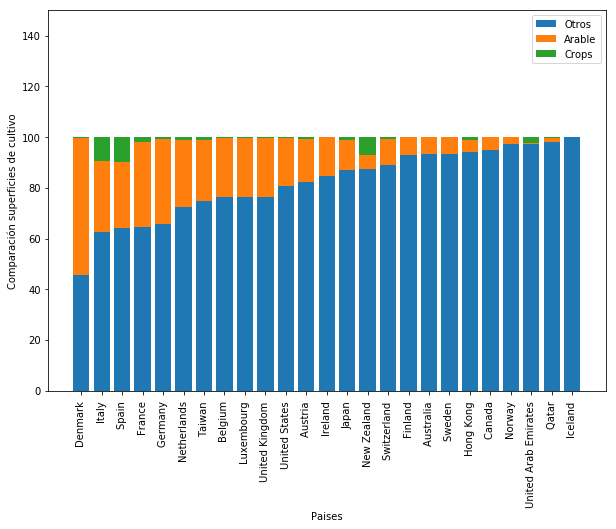

In [ ]:
#2.3


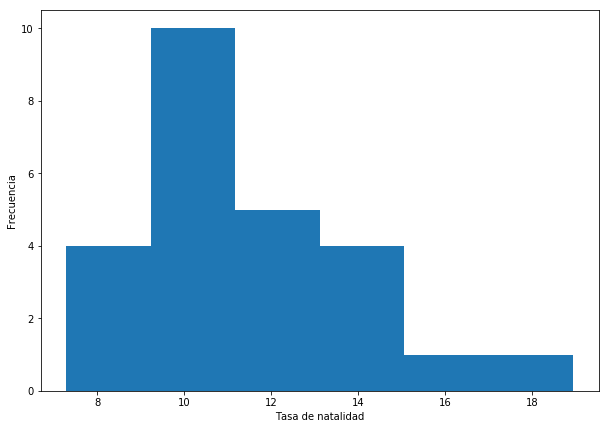

In [ ]:
#2.4


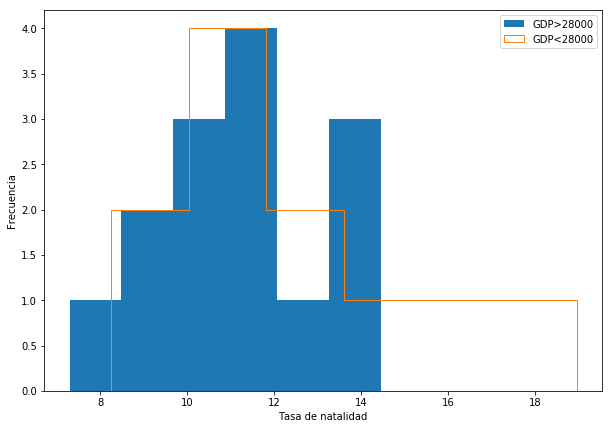

In [ ]:
#2.5


## <a id='boxplot'>Gráficos de  boxplot</a>

### Boxplots
Otro tipo de gráfico muy intersante en estadística, junto con los histogramas son los diagramas de **boxplot**. Para ello utilizaremos el método ``.boxplot``.   Tenemos que tener la precaución de incluir datos sin NaN, para ello utilizaremos el método ``dropna()``


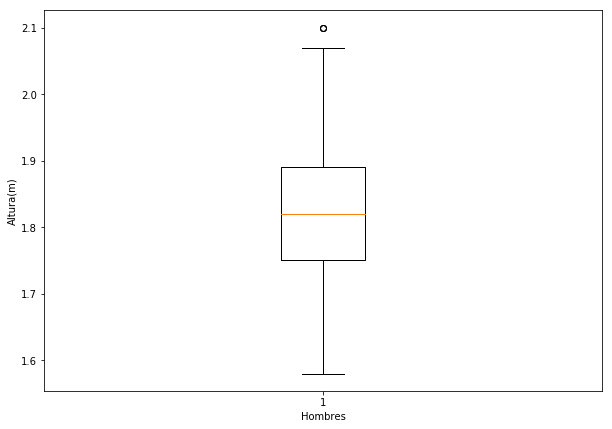

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.boxplot(Deportistas_hombres["height"].dropna())
ax.set_xlabel("Hombres")
ax.set_ylabel("Altura(m)")
plt.show()

Podemos incluir más de una caja en un mismo gráfico...

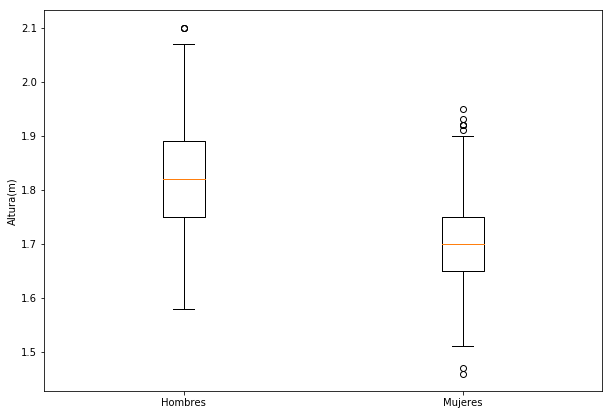

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.boxplot([Deportistas_hombres["height"].dropna(),Deportistas_mujeres["height"].dropna()])
ax.set_xticklabels(["Hombres","Mujeres"])
ax.set_ylabel("Altura(m)")
plt.show()

En el boxplot podemos ver la mediana de la distribución, el rango intercuartílico, y la presencia de outliers desde un punto de vista gausiano (1.5 veces el rango intercuartilico por arriba y por abajo). 




##  Ejercicio 3

* Carga el fichero ``countries_r_jgx.csv`` con la opción de ``read_csv`` para que los índices del data frame en la columna ``Country``. Asegurate de utilizar como separador decimal la ``,`` con la opcion ``decimal=","``. 
* Representa en un gráfico de boxplot la variable ``GDP``  de todos los paises del dataset. No olvides poner etiquetas en los ejes.
* Compara las distribuciones de la variable ``Sec_Service``, utilizando diagramas de caja,  para aquellos paises con un valor de la variable ``GDP`` mayor de 28000 frente a los que toman un valor menor.  No olvides colocar una leyenda que clarifique el gráfico. Incluye tambien el boxplot ``Sec_Service`` sin segmentar por la variable ``GDP``
* Repite el gráfico anterior para la variable ``Sec_Agriculture`` y juega un poco con las opciones estéticas del boxplot.


In [ ]:
#3.1


,Population,Area,Net.migration,GDP,Phones,Surf_Arable,Surf_Crops,Surf_Other,Climate,Birthrate,Deathrate,Sec_Agriculture,Sec_Industry,Sec_Service
Country,,,,,,,,,,,,,,
Australia,20264082,7686850,3.98,29000,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
Austria,8192880,83870,2.00,30000,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678
Belgium,10379067,30528,1.23,29100,462.6,23.28,0.40,76.32,3.0,10.38,10.27,0.010,0.240,0.749
Canada,33098932,9984670,5.96,29800,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
Denmark,5450661,43094,2.48,31100,614.6,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735


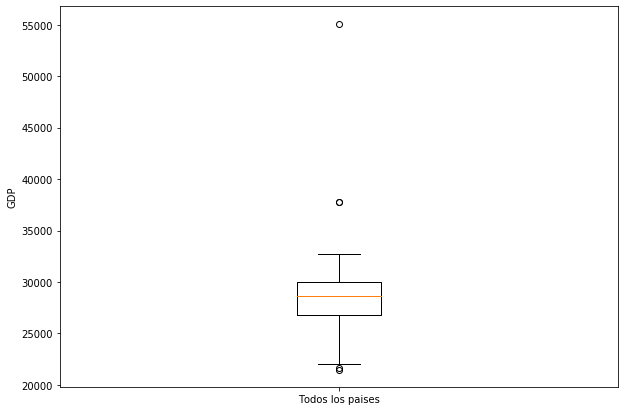

In [ ]:
#3.2


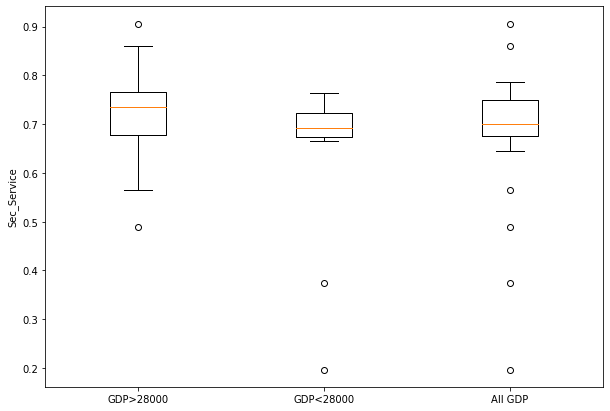

In [ ]:
#3.3


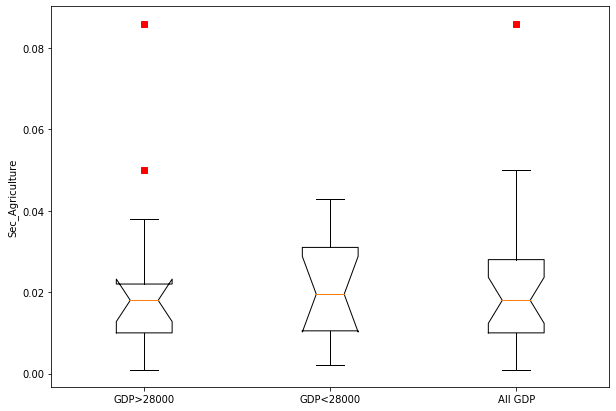

In [ ]:
#3.4


## <a id='dispersion'>Gráficos de dispersión (Scatter plots)</a>

En muchas ocasiones es interesante estudiar la relación que hay entre dos variables en lo que se denomina análisis bivariante. Vamos a cargar el fichero ``Cars_93_jgx.csv`` para ver algunos ejemplos de este tipo de gráficos.

In [ ]:
cars = pd.read_csv("../data_jgx/Cars93_jgx.csv",index_col=1)
cars=cars.loc[:,"Model":]
cars.head()
#Por si hubieran NaN, no es el caso
#cars.dropna(thresh=cars.shape[1]) #filtra las muestras que tienen cars.shape[1] variables co
#cars.shape[1] #1 Conocer el número de columnas, 0 filas



,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
Manufacturer,,,,,,,,,,,,,,,,,,,,,
Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


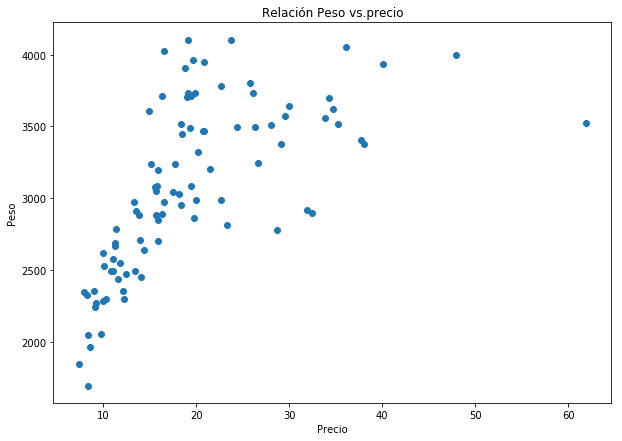

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.scatter(cars["Price"],cars["Weight"])
ax.set_xlabel("Precio")
ax.set_ylabel("Peso")
ax.set_title("Relación Peso vs.precio")

plt.show()


Podemos incluir información de color para diferenciar dos series de puntos. En este caso, filtramos los coches de dos tamaños, pequeño y grande.

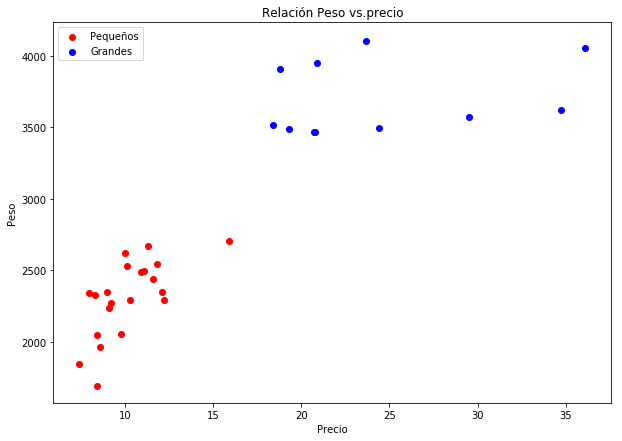

In [ ]:
Small=cars.loc[cars["Type"]=="Small",:]
Large=cars.loc[cars["Type"]=="Large",:]

fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
ax.scatter(Small["Price"],Small["Weight"],color="red",label="Pequeños")
ax.scatter(Large["Price"],Large["Weight"],color="blue",label="Grandes")



ax.set_xlabel("Precio")
ax.set_ylabel("Peso")
ax.set_title("Relación Peso vs.precio")
ax.legend()
plt.show()

Supongamos que queremos incluir información de una tercera variable numérica (tiene que ser de tipo float64) en forma de color en el gráficos de scattering. Uitlizaremos el argumento ``c`` Veamos un ejemplo

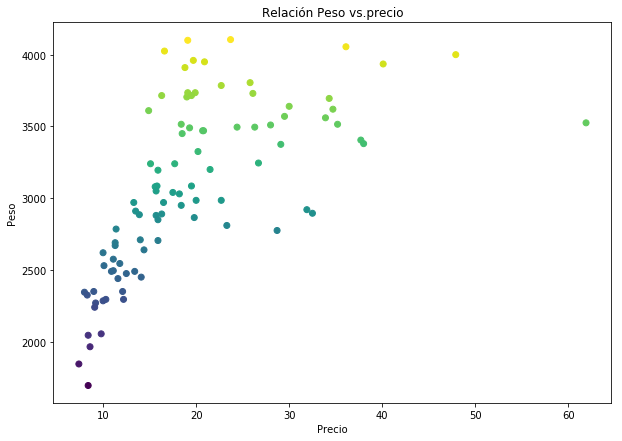

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
cars["Weight"].astype("float64") #Lo convertimos a float64 porque de inicio es int64, c tiene que ser float!
ax.scatter(cars["Price"],cars["Weight"],
           c=cars["Weight"])
ax.set_xlabel("Precio")
ax.set_ylabel("Peso")
ax.set_title("Relación Peso vs.precio")
plt.show()

Podemos variar el símbolo de los marcadores...

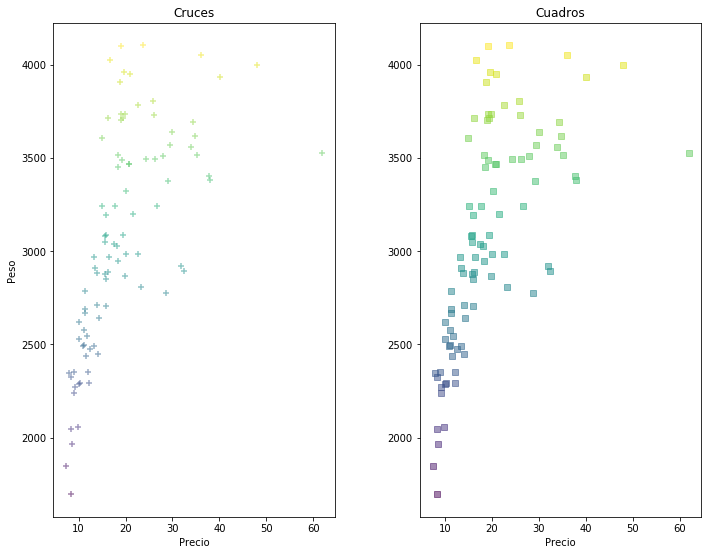

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10, 7)
cars["Weight"].astype("float64") #Lo convertimos a float64 porque de inicio es int64, c tiene que ser float!
ax[0].scatter(cars["Price"],cars["Weight"],
           alpha=0.5, c=cars["Weight"],marker='+')
ax[0].set_xlabel("Precio")
ax[0].set_ylabel("Peso")
ax[0].set_title("Cruces")

ax[1].scatter(cars["Price"],cars["Weight"],
           alpha=0.5, c=cars["Weight"],marker='s')
ax[1].set_xlabel("Precio")
ax[1].set_title("Cuadros")

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.01, top=0.99,
                   hspace=0.4, wspace=0.3) #Ajustamos el subplot para que me quepan los títulos
#plt.show()

## <a id='estilo'>El estilo importa....</a>

Podemos modificar el estilo global de la representación de nuestros gráficos en **matplotlib**

In [ ]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


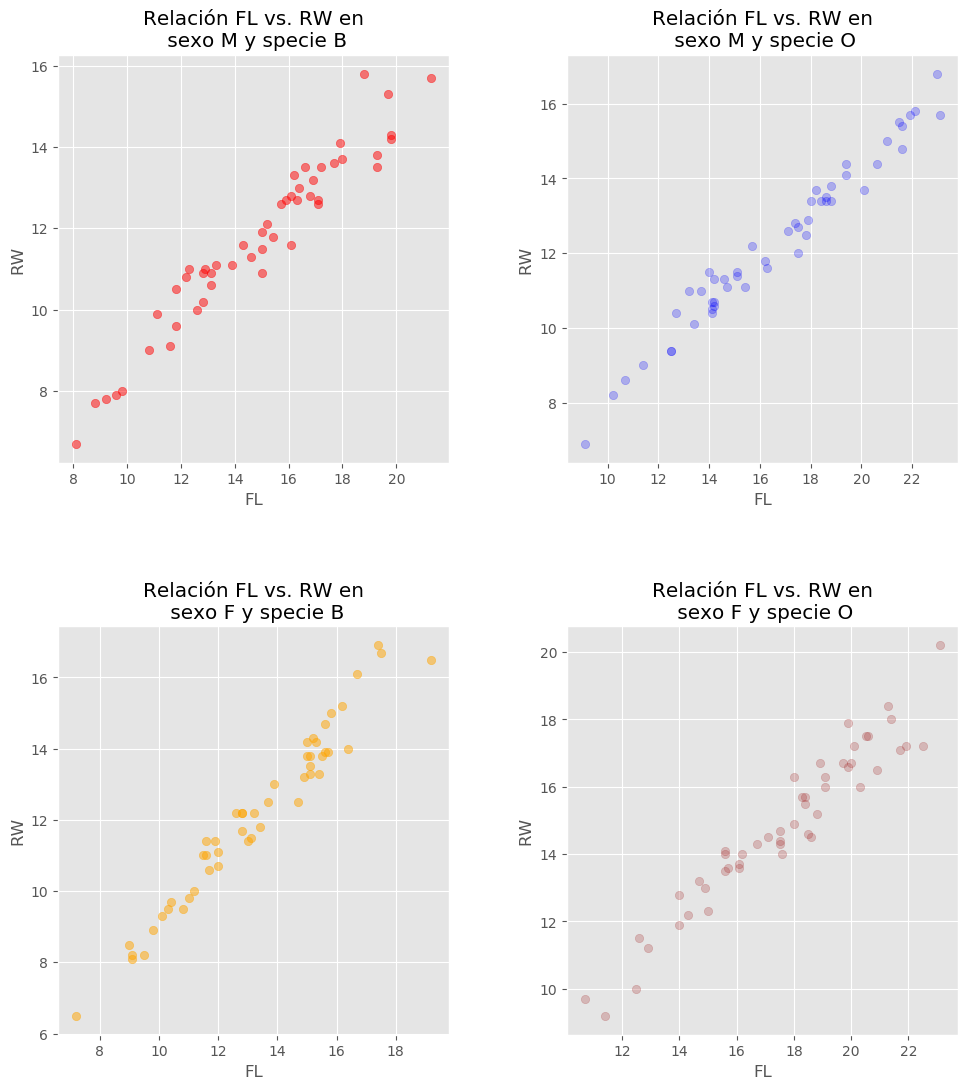

In [ ]:
#Hacemos que el gráfico tenga apariencia ggplot de R, en lugar de python
plt.style.use("ggplot")

#Para volver al estilo por defecto
#plt.style.use("default")

#Para ver los estilos disponibles
#print(plt.style.available)


#Creamos el subplot
fig,ax=plt.subplots(2,2)
fig.set_size_inches(10, 7)

#Subplot 1
ax[0,0].scatter(crabs_M_B["FL"],crabs_M_B["RW"],color="red",alpha=0.5)
ax[0,0].set_xlabel("FL")
ax[0,0].set_ylabel("RW")
ax[0,0].set_title("Relación FL vs. RW en\n sexo M y specie B")

#Subplot 2
ax[0,1].scatter(crabs_M_O["FL"],crabs_M_O["RW"],color="blue",alpha=0.25)
ax[0,1].set_xlabel("FL")
ax[0,1].set_ylabel("RW")
ax[0,1].set_title("Relación FL vs. RW en\n sexo M y specie O")

#Subplot 3
ax[1,0].scatter(crabs_F_B["FL"],crabs_F_B["RW"],color="orange",alpha=0.5)
ax[1,0].set_xlabel("FL")
ax[1,0].set_ylabel("RW")
ax[1,0].set_title("Relación FL vs. RW en\n sexo F y specie B")

#Subplot 4
ax[1,1].scatter(crabs_F_O["FL"],crabs_F_O["RW"],color="brown",alpha=0.25)
ax[1,1].set_xlabel("FL")
ax[1,1].set_ylabel("RW")
ax[1,1].set_title("Relación FL vs. RW en\n sexo F y specie O")

fig.subplots_adjust(left=0.08, right=0.98, bottom=-0.2, top=1.2,
                   hspace=0.4, wspace=0.3) #Ajustamos el subplot para que me quepan los títulos


plt.show()

In [ ]:
plt.style.use("default")

Por último vamos a ver como compartir los gráficos que construimos con matplolib. La idea es almacenar la figura en un fichero, asi que utilizaremos el método ``.savefig``. Veamos algunos ejemplos de uso. 

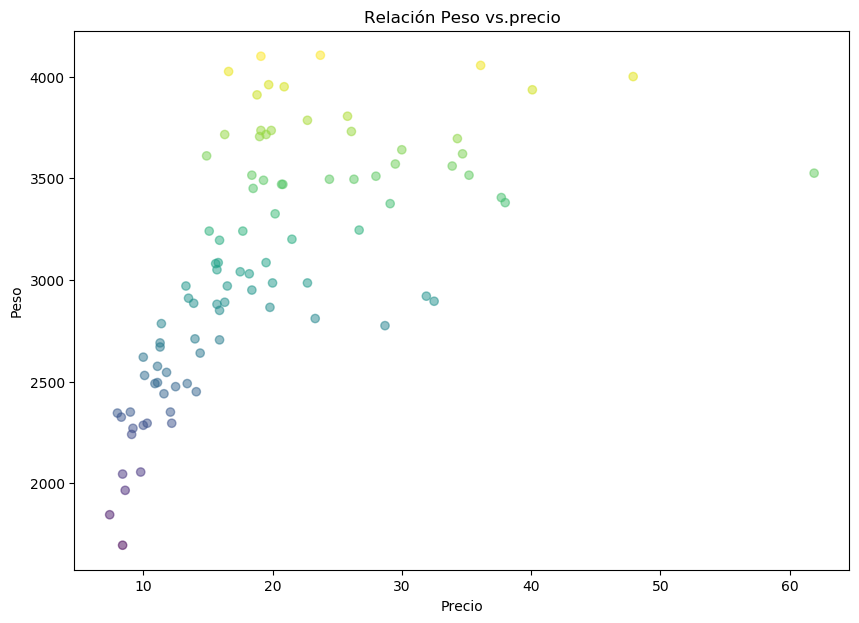

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
cars["Weight"].astype("float64") #Lo convertimos a float64 porque de inicio es int64, c tiene que ser float!
ax.scatter(cars["Price"],cars["Weight"],
           alpha=0.5, c=cars["Weight"])
ax.set_xlabel("Precio")
ax.set_ylabel("Peso")
ax.set_title("Relación Peso vs.precio")
plt.show()

#Formato png, poca compresión
fig.savefig("./Figuras/Figura1_png.png",dpi=300)  #dpi resolución de la imagen

#Formato .jpg, sitios web mas compresión
fig.savefig("./Figuras/Figura1_25.jpg", quality=25)

fig.savefig("./Figuras/Figura1_75.jpg", quality=75)

#Formato .svg, formato vectorial editable con illustrator, etc..
fig.savefig("./Figuras/Figura1_vec.svg")

#Formato .pdf, formato vectorial editable con illustrator, etc..
fig.savefig("./Figuras/Figura1_vec.pdf")
fig.savefig()

Podemos modificar el tamaño de la figura con la ayuda del método ``.set_size_inches``. Veamos el siguiente ejemplo...

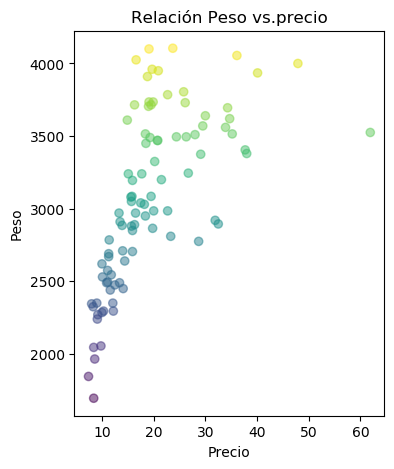

In [ ]:
fig,ax=plt.subplots()
cars["Weight"].astype("float64") #Lo convertimos a float64 porque de inicio es int64, c tiene que ser float!
ax.scatter(cars["Price"],cars["Weight"],
           alpha=0.5, c=cars["Weight"])
ax.set_xlabel("Precio")
ax.set_ylabel("Peso")
ax.set_title("Relación Peso vs.precio")

fig

fig.set_size_inches([4,5]) #ancho, alto en pulgadas



Más información sobre matplotlib, pyplot, etc... 

https://matplotlib.org